In [30]:
import json
import requests
from pprint import pprint
# from config import api_key
from pygments import highlight, lexers, formatters
import pandas as pd
#from flask import jsonify
from matplotlib import pyplot as plt
import numpy as np

from matplotlib.cm import viridis
from matplotlib.colors import to_hex
import scipy.stats as st

import gmaps
import gmaps.datasets
import gmaps.geojson_geometries

# gmaps.configure(api_key = api_key)
gmaps.configure(api_key = '')

In [31]:
## Data from https://rapidapi.com/

# make a call to the URL 
url = "https://corona-virus-world-and-india-data.p.rapidapi.com/api"

# pass key and host login
headers = {
    'x-rapidapi-host': "corona-virus-world-and-india-data.p.rapidapi.com",
    'x-rapidapi-key': ""
    }

# Store the information from the GET call into the "response" variable
response = requests.request("GET", url, headers=headers)
pprint(response.json())

# convert JSON into a python dictorinary format in order to read/loop through it.
# results = response.json()

# Print result to confirm
# pprint(results["countries_stat"])

# create for loop to get each result from countries stat which is the main key of the JSON
for key in results["countries_stat"]:
    print(key["country_name"])
    
    

{'countries_stat': [{'active_cases': '762,526',
                     'cases': '903,775',
                     'country_name': 'USA',
                     'deaths': '50,988',
                     'deaths_per_1m_population': '154',
                     'new_cases': '17,333',
                     'new_deaths': '752',
                     'region': '',
                     'serious_critical': '14,932',
                     'tests_per_1m_population': '14,823',
                     'total_cases_per_1m_population': '2,730',
                     'total_recovered': '90,261',
                     'total_tests': '4,906,327'},
                    {'active_cases': '104,885',
                     'cases': '219,764',
                     'country_name': 'Spain',
                     'deaths': '22,524',
                     'deaths_per_1m_population': '482',
                     'new_cases': '6,740',
                     'new_deaths': '367',
                     'region': '',
                     'ser

                     'cases': '2,614',
                     'country_name': 'Kuwait',
                     'deaths': '15',
                     'deaths_per_1m_population': '4',
                     'new_cases': '215',
                     'new_deaths': '1',
                     'region': '',
                     'serious_critical': '60',
                     'tests_per_1m_population': '0',
                     'total_cases_per_1m_population': '612',
                     'total_recovered': '613',
                     'total_tests': '0'},
                    {'active_cases': '1,385',
                     'cases': '2,506',
                     'country_name': 'Bahrain',
                     'deaths': '8',
                     'deaths_per_1m_population': '5',
                     'new_cases': '289',
                     'new_deaths': '0',
                     'region': '',
                     'serious_critical': '2',
                     'tests_per_1m_population': '61,922',
              

                     'deaths': '10',
                     'deaths_per_1m_population': '0.4',
                     'new_cases': '13',
                     'new_deaths': '0',
                     'region': '',
                     'serious_critical': '4',
                     'tests_per_1m_population': '12,211',
                     'total_cases_per_1m_population': '11',
                     'total_recovered': '126',
                     'total_tests': '347,236'},
                    {'active_cases': '211',
                     'cases': '309',
                     'country_name': 'Mali',
                     'deaths': '21',
                     'deaths_per_1m_population': '1',
                     'new_cases': '0',
                     'new_deaths': '0',
                     'region': '',
                     'serious_critical': '0',
                     'tests_per_1m_population': '100',
                     'total_cases_per_1m_population': '15',
                     'total_recovered': '

                     'deaths_per_1m_population': '6',
                     'new_cases': '0',
                     'new_deaths': '0',
                     'region': '',
                     'serious_critical': '0',
                     'tests_per_1m_population': '1,853',
                     'total_cases_per_1m_population': '85',
                     'total_recovered': '11',
                     'total_tests': '304'},
                    {'active_cases': '9',
                     'cases': '14',
                     'country_name': 'St. Vincent Grenadines',
                     'deaths': '0',
                     'deaths_per_1m_population': '0',
                     'new_cases': '1',
                     'new_deaths': '0',
                     'region': '',
                     'serious_critical': '0',
                     'tests_per_1m_population': '973',
                     'total_cases_per_1m_population': '126',
                     'total_recovered': '5',
                     'total

In [32]:
results = response.json()
# print(results["countries_stat"])

In [33]:
# create a DataFrame from scratch (temporary to test)
pd.DataFrame(columns=["country_name"])

# create variable to hold the value belonging to each key in the dataset
countries = []
cases = []
deaths = []
active_cases = []
new_cases = []
new_deaths = []
total_recovered = []
serious_critical = []
deaths_per_1m_population = []
total_cases_per_1m_population = []

# total_tests = []

# for loop to store the data for each key
for key in results["countries_stat"]:
    countries.append(key["country_name"])
    cases.append(key["cases"])
    deaths.append(key["deaths"])
    new_deaths.append(key["new_deaths"])
    new_cases.append(key["new_cases"])
    active_cases.append(key["active_cases"])
    total_recovered.append(key["total_recovered"])
    serious_critical.append(key["serious_critical"])
    deaths_per_1m_population.append(key["deaths_per_1m_population"])
    total_cases_per_1m_population.append(key["total_cases_per_1m_population"])
    #total_tests.append(key["total_tests"])
    
# print(countries)

In [34]:
# Store dataframe into variable permanent

data = pd.DataFrame(columns=["Country", "Total Cases", "Total Deaths", "New Deaths", "New Cases", "Active Cases", "Total Recovered", "Serious Critical", "Deaths Per 1m_population", "Total Cases Per 1m_population"])
data = data.dropna()
data["Country"] = countries
data["Total Cases"] = cases
data["Total Deaths"] = deaths
data["New Deaths"] = new_deaths
data["New Cases"] = new_cases
data["Active Cases"] = active_cases
data["Total Recovered"] = total_recovered
data["Serious Critical"] = serious_critical
data["Deaths Per 1m_population"] = deaths_per_1m_population
data["Total Cases Per 1m_population"]
# data['Total tests'] = total_tests
data.head(10)


,Country,Total Cases,Total Deaths,New Deaths,New Cases,Active Cases,Total Recovered,Serious Critical,Deaths Per 1m_population,Total Cases Per 1m_population
0,USA,"903,775","50,988",752,"17,333","762,526","90,261","14,932",154,NaN
1,Spain,"219,764","22,524",367,"6,740","104,885","92,355","7,705",482,NaN
2,Italy,"192,994","25,969",420,"3,021","106,527","60,498","2,173",430,NaN
3,France,"159,828","22,245",389,"1,645","94,090","43,493","4,870",341,NaN
4,Germany,"154,159","5,653",78,"1,030","41,706","106,800","2,908",67,NaN
5,UK,"143,464","19,506",768,"5,386","123,614",N/A,"1,559",287,NaN
6,Turkey,"104,912","2,600",109,"3,122","80,575","21,737","1,790",31,NaN
7,Iran,"88,194","5,574",93,"1,168","16,021","66,599","3,121",66,NaN
8,China,"82,804","4,632",0,6,915,"77,257",57,3,NaN
9,Russia,"68,622",615,60,"5,849","62,439","5,568","2,300",4,NaN


In [35]:
marker_locations = [
    (46.227638, 2.213749),
    (51.165691, 10.451526),
    (41.87194, 12.56738),
    (40.463667, -3.74922),
    (37.09024, -95.712891),
    (55.378051, -3.435973),
    (38.963745, 35.243322),
    (32.427908, 53.688046),
    (35.86166, 104.195397),
    (61.52401, 105.318756)
]

fig = gmaps.figure()
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [36]:
data["Total Recovered"] = data["Total Recovered"].str.replace("N/A","0")
data["Total Recovered"] = data["Total Recovered"].str.replace(",","").astype(float)
#print(data["Total Recovered"].head(10)/10000)

fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(marker_locations, weights=(data["Total Recovered"].head(10)/10000), dissipating=False, max_intensity=5, point_radius=5)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [37]:
data["Total Cases"] = data["Total Cases"].str.replace("N/A","0")
data["Total Cases"] = data["Total Cases"].str.replace(",","").astype(float)

The correlation between both factors is 0.71


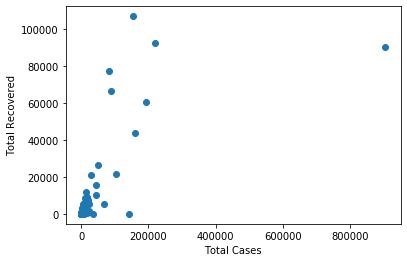

In [38]:
# Compare the calcualted Pearson's r to the plots
plt.scatter(data["Total Cases"],data["Total Recovered"])
plt.xlabel('Total Cases')
plt.ylabel('Total Recovered')
correlation = st.pearsonr(data["Total Cases"],data["Total Recovered"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()